Epoch [100/1000], Loss: 0.0558
Epoch [200/1000], Loss: 0.0357
Epoch [300/1000], Loss: 0.0280
Epoch [400/1000], Loss: 0.0238
Epoch [500/1000], Loss: 0.0210
Epoch [600/1000], Loss: 0.0191
Epoch [700/1000], Loss: 0.0176
Epoch [800/1000], Loss: 0.0165
Epoch [900/1000], Loss: 0.0155
Epoch [1000/1000], Loss: 0.0148
Test Accuracy: 100.00%


/root/miniconda3/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


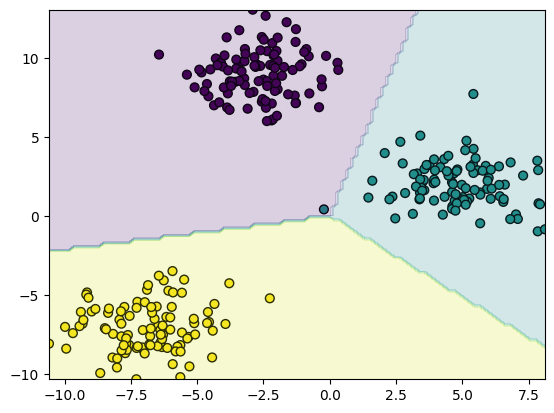

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 生成多分类数据（3个类别）
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)  # 多分类标签为整数类型

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 定义多分类逻辑回归模型
class SoftmaxRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # 输入维度为2，输出维度为类别数

    def forward(self, x):
        return self.linear(x)  # 在交叉熵损失中会自动应用Softmax

# 实例化模型，输入维度为2（二维特征），输出维度为3（类别数）
model = SoftmaxRegressionModel(input_dim=2, output_dim=3)

# 3. 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降，学习率为0.01

# 4. 训练模型
epochs = 1000
for epoch in range(epochs):
    model.train()  # 切换到训练模式
    optimizer.zero_grad()  # 清零梯度

    # 前向传播
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)  # 计算损失

    # 反向传播
    loss.backward()
    optimizer.step()  # 更新参数

    # 打印训练进度
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 评估模型
model.eval()  # 切换到评估模式
with torch.no_grad():
    # 在测试集上预测
    y_pred_test = model(X_test)
    y_pred_class = y_pred_test.argmax(dim=1)  # 选择概率最大的类别作为预测类别
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 可视化分类结果
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
x_boundary = torch.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = torch.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx, yy = torch.meshgrid(x_boundary, y_boundary)
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
with torch.no_grad():
    preds = model(grid).argmax(dim=1).reshape(xx.shape)
plt.contourf(xx, yy, preds, alpha=0.2, cmap='viridis')
plt.show()
